# Student Performance Anazlyzer

**this project understands how the student's academic performance influenced by factors like Gender, race, Parental level of education**

this data consist of 8 columns and 1000 rows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

no null values

## dataset information
1. gender - sex of students 
2. race/ethinicity  - ethinicity of students(Group A,B,C,D,E)
3. parntal level of education - parent's final education(bachelors, masters, some college, associate degree, high school)
4. lunch - having lunch before test (standard or free/reduced)
5. test preparation course - taken or completed/not completed
6. math score 
7. reading score 
8. writing score

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


statistical insights - 
1. mean of all 3 is very close to each other around 67 - 69, so as standard deviation around 14 - 15
2. significant difference is minimum score of maths, reading and writing as 0 for maths, 17 for reading, 10 for writing

In [8]:
print(f'{df['gender'].value_counts()}\n')
print(f'{df['race/ethnicity'].value_counts()}\n')
print(f'{df['parental level of education'].value_counts()}\n')
print(f'{df['lunch'].value_counts()}\n')
print(f'{df['test preparation course'].value_counts()}\n')

gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64



In [9]:
# categorizing data

categorical_features = df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
numerical_features = df[['math score','reading score','writing score']]

In [10]:
# creating new columns - total score and average score
df['Total score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average score'] = (df['Total score']/3).round(2)

In [11]:
print(f'number of students who got full marks in maths - {len(df[df['math score'] == 100])}')
print(f'number of students who got full marks in reading - {len(df[df['reading score'] == 100])}')
print(f'number of students who got full marks in writing - {len(df[df['writing score'] == 100])}')

number of students who got full marks in maths - 7
number of students who got full marks in reading - 17
number of students who got full marks in writing - 14


In [12]:
print(f'number of students who got less than 33 marks in maths - {len(df[df['math score'] < 33])}')
print(f'number of students who got less than 33 marks in reading - {len(df[df['reading score'] < 33])}')
print(f'number of students who got less than 33 marks in writing - {len(df[df['writing score'] < 33])}')

number of students who got less than 33 marks in maths - 19
number of students who got less than 33 marks in reading - 11
number of students who got less than 33 marks in writing - 12


In [13]:
print(f'number of students who got less than 33 marks in all three - {len(df[(df['math score'] < 33) & (df['reading score'] < 33) & (df['writing score'] < 33)])}')

number of students who got less than 33 marks in all three - 7


insight - 
1. no. of students who got full marks in maths is not more than half of no. of students who got full marks in reading and writing
2. total of 42 students failed...19 in maths, 11 in reading and 12 in writing
3. no. of students who failed in all three - 7

# Univariate Analysis

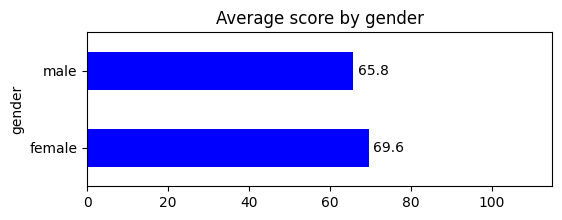

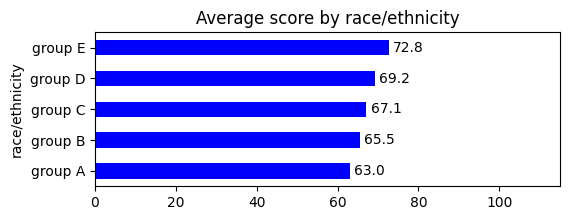

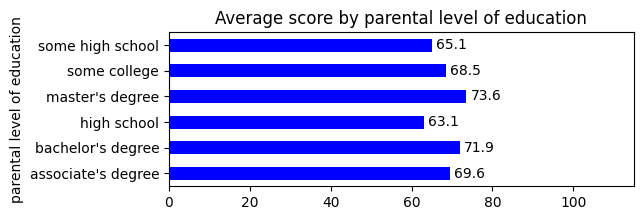

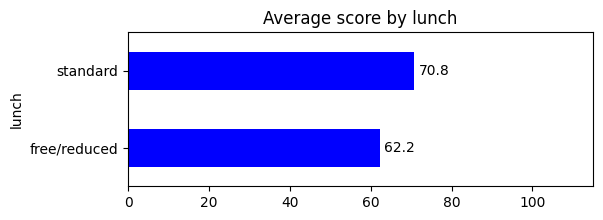

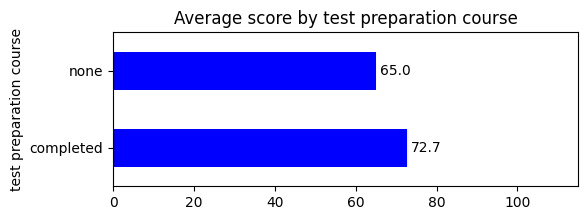

In [14]:
for col_name in categorical_features:
    plt.figure(figsize=(6, 2))
    ax = df.groupby(col_name)['Average score'].mean().plot(kind='barh', color='b')
    ax.bar_label(ax.containers[0], fmt='%.1f', padding=3)

    plt.title(f'Average score by {col_name}')
    ax.set_xlim(right=df['Average score'].max() * 1.15)
    plt.show()

insights - 
1. Average score of female is slight more than that of males
2. constant but non uniform decrease in average score from group E to A
3. students of parents having masters degree tends to have the highest average score
4. student having standard lunch before test has an average score of ~70% and the ones with free/reduced have the average score ~60%
5. average score of students who completed the test preparation course is higher(72.7%) than those who didnt complete/enroll in course(65.0%).

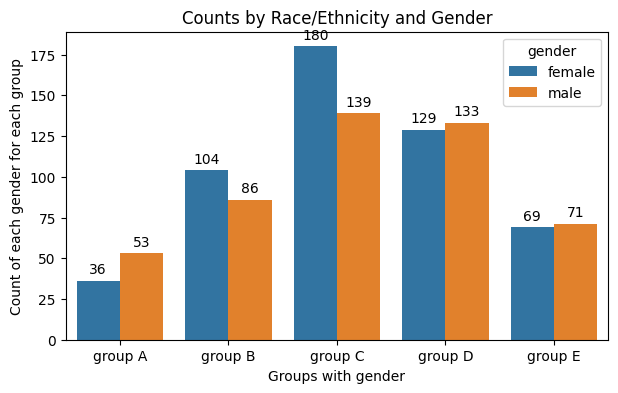

In [15]:
counts = df.groupby(['race/ethnicity','gender']).size().reset_index(name='count')

plt.figure(figsize=(7,4))
ax = sns.barplot(data=counts, x='race/ethnicity', y='count', hue='gender')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.xlabel('Groups with gender')
plt.ylabel('Count of each gender for each group')
plt.title('Counts by Race/Ethnicity and Gender')
plt.show()


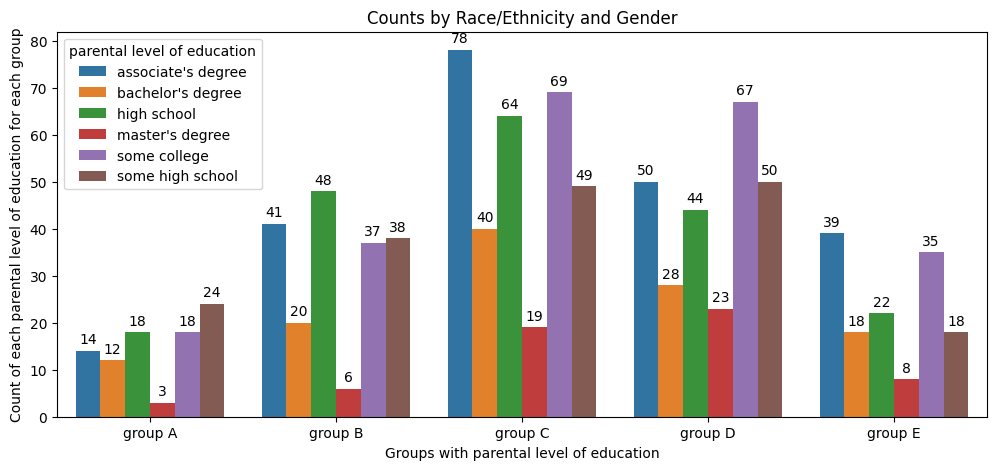

In [16]:
counts = df.groupby(['race/ethnicity','parental level of education']).size().reset_index(name='count')

plt.figure(figsize=(12,5))
ax = sns.barplot(data=counts, x='race/ethnicity', y='count', hue='parental level of education')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.xlabel('Groups with parental level of education')
plt.ylabel('Count of each parental level of education for each group')
plt.title('Counts by Race/Ethnicity and Gender')
plt.show()

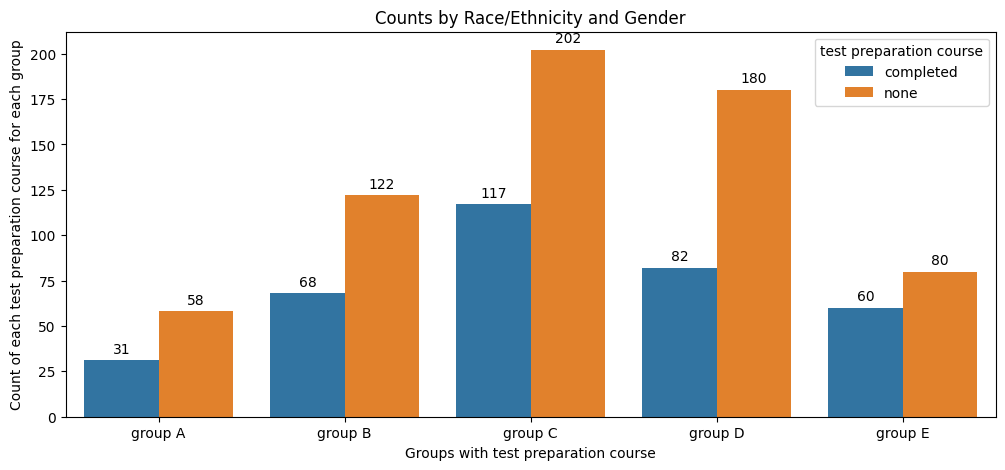

In [17]:
counts = df.groupby(['race/ethnicity','test preparation course']).size().reset_index(name='count')

plt.figure(figsize=(12,5))
ax = sns.barplot(data=counts, x='race/ethnicity', y='count', hue='test preparation course')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.xlabel('Groups with test preparation course')
plt.ylabel('Count of each test preparation course for each group')
plt.title('Counts by Race/Ethnicity and Gender')
plt.show()

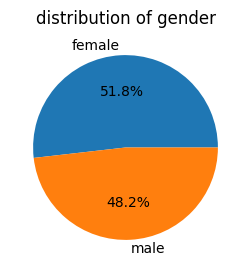

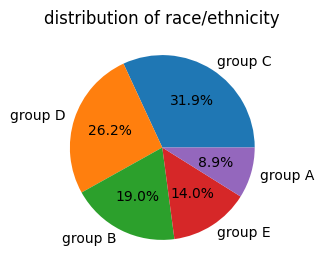

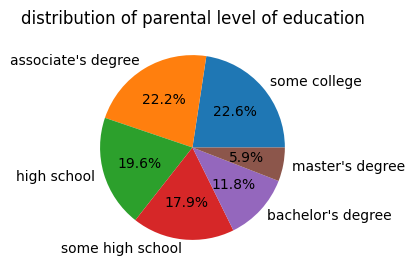

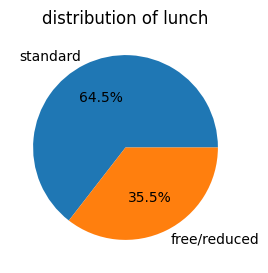

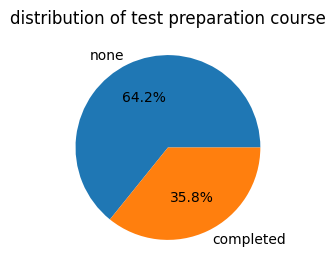

In [18]:
for cols in categorical_features:
    plt.figure(figsize=(3,3))
    plt.pie(x=df[cols].value_counts(),labels=df[cols].value_counts().index,autopct='%1.1f%%')
    plt.title(f'distribution of {cols}')
    plt.show()

## encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded = encoder.fit_transform(df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']])
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [21]:
df = pd.concat([df,encoded_df],axis=1)
for cols in categorical_features:
        df.drop(cols,axis=1,inplace=True)

In [22]:
df.to_csv('df_cleaned.csv',index=False)

In [23]:
df_cleaned = pd.read_csv('df_cleaned.csv')

In [24]:
df_cleaned

,math score,reading score,writing score,Total score,Average score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,72.67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,69,90,88,247,82.33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,90,95,93,278,92.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,47,57,44,148,49.33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,76,78,75,229,76.33,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,94.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
996,62,55,55,172,57.33,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,59,71,65,195,65.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,68,78,77,223,74.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Assuming X is your DataFrame
# X = pd.DataFrame(...) 

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

NameError: name 'X' is not defined